<a href="https://colab.research.google.com/github/mo-alrz/Machine-learning/blob/main/Day5_6_Practice_Time_series_wrangling_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How Pandas plays along with time series?

Generally speaking _very nicely_.

Let's see!

(Credits go to: [EarthPy](http://earthpy.org/pandas-basics.html))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Ok, this is _really_ unhealthy practice, but honestly, do YOU want to do the demo for the C level
# with big orangish blobs on the screen?
# Exactly. Neither do I. :-P

# Don't tell me I didn't WARN you! :-P


In [ ]:
# First things first...
import pandas as pd

## Load troubles

In [ ]:
print("Let's not forget, if we are in Colab, we are forced to use some bash magic to get the file for each new VM again!")
!wget "https://drive.google.com/uc?export=download&id=1h9iCHXw78jx7IsDPBKPomhA4GZCBpejp" -O AirPassengers.csv

Let's not forget, if we are in Colab, we are forced to use some bash magic to get the file for each new VM again!
--2023-03-06 19:18:29--  https://drive.google.com/uc?export=download&id=1h9iCHXw78jx7IsDPBKPomhA4GZCBpejp
Resolving drive.google.com (drive.google.com)... 142.251.111.102, 142.251.111.113, 142.251.111.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.111.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m1ee49khbrl68so95276ogth5tae5ml0/1678130250000/07111638629254909344/*/1h9iCHXw78jx7IsDPBKPomhA4GZCBpejp?e=download&uuid=389463e0-4799-4aff-943b-fd41a79b993d [following]
--2023-03-06 19:18:29--  https://doc-14-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m1ee49khbrl68so95276ogth5tae5ml0/1678130250000/07111638629254909344/*/1h9iCHXw78jx7IsDPBKPomhA4GZCBpejp?e=download&uuid=389463e0-4799-4aff-943b-fd41a

In [ ]:
# Load
df = pd.read_csv("AirPassengers.csv",header=0)


In [ ]:
# Let's just check the type and content of the columns for safety:

print(df.dtypes)
df.head()

Month          object
#Passengers     int64
dtype: object


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Oops! Do we see any suspicious with the `Month` column?

In [ ]:

print("Ok, what is dtypes returning?")
print(df.dtypes[0])

import numpy as np

print("\nIn numpy we have an object dtype: ",np.dtype(object))

assert df.dtypes[0] == np.dtype(object)
print("Yeah, we're right. It's the same. :-)\n")

print("Takeaway: If Pandas does not recognize the data, it uses Numpy's 'WTF?' class (='object').")

Ok, what is dtypes returning?
object

In numpy we have an object dtype:  object
Yeah, we're right. It's the same. :-)

Takeaway: If Pandas does not recognize the data, it uses Numpy's 'WTF?' class (='object').


## Let us convert to proper dates!

In [ ]:
df.Month.astype('datetime64[ns]')

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [ ]:
print("Converting the easy way...\n")

reindexed_df = df.copy()
reindexed_df.Month = reindexed_df.Month.astype('datetime64[ns]')
reindexed_df.head()

Converting the easy way...



,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
print("By the way, can we write this more properly?")
display(pd.to_datetime(df['Month'], format='%Y-%m').head())
print("Looks good!\n")

assert (reindexed_df.Month == pd.to_datetime(df['Month'], format='%Y-%m')).all()
print("And happily, the two seem to be the same! :-)")

By the way, can we write this more properly?


0   1949-01-01
1   1949-02-01
2   1949-03-01
3   1949-04-01
4   1949-05-01
Name: Month, dtype: datetime64[ns]

Looks good!

And happily, the two seem to be the same! :-)


In [ ]:
## set as index
reindexed_df.set_index("Month", inplace=True)

In [ ]:
reindexed_df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
reindexed_df.index.values[0].astype(int)

-662688000000000000

In [ ]:
reindexed_df.index.values[-1].astype(int)

-286675200000000000

More on datatime conversion and indexing can be found [here](https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea).

In [ ]:
reindexed_df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
reindexed_df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


If we would like to recreate an index like this in the future we should use the convenient Pandas functions!

Consult: [Pandas date_range](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html)


In [ ]:
dates = pd.date_range('1949-01-01',   ## where to start
                      periods=reindexed_df.shape[0], ## how many to generate
                      freq=pd.offsets.MonthBegin(1),  ## what frequency to use (month begin, use every 1 month)
                      )

print(dates)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')


By default, using `freq='M'` would result in the last day of the month.

Therefore we use the nice built-in function from `pd.offsets`.

In fact, great amount of convenience shortcuts are there:

<img src="http://drive.google.com/uc?export=view&id=1PBavHbwYB1DDIizt4NN8m-ymNhxw3Bpw" width=65%>


We don't believe how useful it is, except when we need it. :-P

## Plotting

Happily enough, Pandas default plotting (that is Matplotlib in the background) also plays nice with dates as indices.

> Note, in order to display the plots in the notebook, you may have to call `%pylab inline` (or `%matplotlib inline`) once.

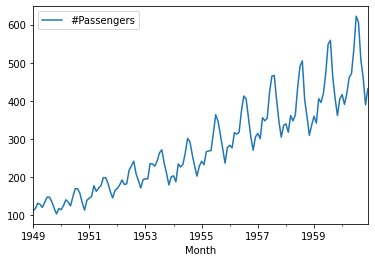

In [ ]:
reindexed_df.plot();
## recall: the ; is to avoid the unnecessary printout of the return value (in this case, an "AxesSubplot" object)

<AxesSubplot:xlabel='Month'>

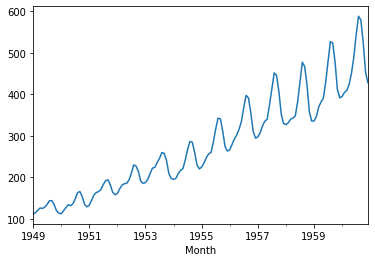

In [ ]:
reindexed_df["#Passengers"].rolling("90D").mean().plot()#.shift(1)

## Slice and dice

We can use nice indexing syntax to access ranges of time series.

We can use dates.


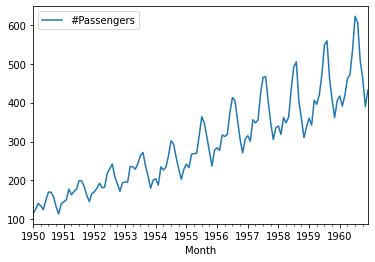

In [ ]:
print("We can use dates.")
reindexed_df['1950':'1960'].plot();

But we can stil use integer index.


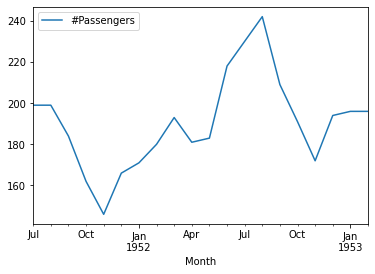

In [ ]:
print("But we can stil use integer index.")
reindexed_df[30:50].plot();

In [ ]:
print("And it even handles dates in an intelligent manner, keeping the hierarchy.\n")
display(reindexed_df.loc["1950"])

And it even handles dates in an intelligent manner, keeping the hierarchy.



,#Passengers
Month,
1950-01-01,115
1950-02-01,126
1950-03-01,141
1950-04-01,135
1950-05-01,125
1950-06-01,149
1950-07-01,170
1950-08-01,170
1950-09-01,158


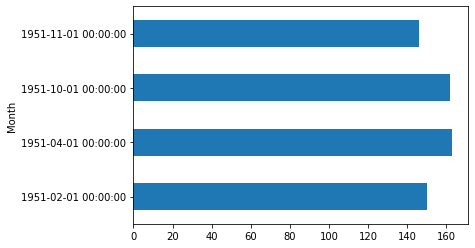

In [ ]:
import datetime
reindexed_df.loc[(reindexed_df["#Passengers"] > 100) & (reindexed_df["#Passengers"] < 165)
        & (reindexed_df.index > datetime.datetime(1951,1,1))
        & (reindexed_df.index < datetime.datetime(1952,1,1)),
        '#Passengers'].plot(kind='barh');

#Original even more fancy here: http://earthpy.org/pandas-basics.html

## Let's shift (gears)

It is one of the most important tasks in time series prediction is to get a time shifted value that we would use for prediction purposes.

Easy!

In [ ]:
reindexed_df["shifted"]=reindexed_df["#Passengers"].shift(freq = 1 * pd.offsets.MonthBegin(1))
reindexed_df

,#Passengers,shifted
Month,,
1949-01-01,112,NaN
1949-02-01,118,112.0
1949-03-01,132,118.0
1949-04-01,129,132.0
1949-05-01,121,129.0
...,...,...
1960-08-01,606,622.0
1960-09-01,508,606.0
1960-10-01,461,508.0


In [ ]:
print("Looks awsome!\n")
print("Except....")

print(reindexed_df.dtypes,"\n\nWTF???\n")

Looks awsome!

Except....
#Passengers      int64
shifted        float64
dtype: object 

WTF???



In [ ]:
print("Any non-numbers in there?" ,reindexed_df.shifted.isna().any())
print("Ah, ok, NaN-s are in there, and that's why it can't get casted to Int.\n")

Any non-numbers in there? True
Ah, ok, NaN-s are in there, and that's why it can't get casted to Int.



In [ ]:
print("Lemme' fixit!")
reindexed_df["shifted"]=reindexed_df["#Passengers"].shift(freq=-1*pd.offsets.MonthBegin(1), fill_value=0).astype(np.int64)
print(reindexed_df.dtypes)
print("WTF *2 ???")


Lemme' fixit!
#Passengers      int64
shifted        float64
dtype: object
WTF *2 ???


What happens here?

In [ ]:
print("Shifted series has NA's:",
      reindexed_df["#Passengers"].shift(freq=-1*pd.offsets.MonthBegin(1), fill_value=0).isna().any())


Shifted series has NA's: False


In [ ]:
print("The shifted series:")
reindexed_df["#Passengers"].shift(freq=-1*pd.offsets.MonthBegin(1))

The shifted series:


Month
1948-12-01    112
1949-01-01    118
1949-02-01    132
1949-03-01    129
1949-04-01    121
             ... 
1960-07-01    606
1960-08-01    508
1960-09-01    461
1960-10-01    390
1960-11-01    432
Name: #Passengers, Length: 144, dtype: int64

In [ ]:
reindexed_df["shifted"]=reindexed_df.shifted.fillna(0).astype(np.int64)

#Observe, if we don't put fancy characters into a column name, we can use a dotted accessor.
#Except for value assignment!!! :-( (We cannot create a new column using a dotted accessor.)

print(reindexed_df.dtypes)

#Passengers    int64
shifted        int64
dtype: object


In [ ]:
reindexed_df

,#Passengers,shifted
Month,,
1949-01-01,112,118
1949-02-01,118,132
1949-03-01,132,129
1949-04-01,129,121
1949-05-01,121,135
...,...,...
1960-08-01,606,508
1960-09-01,508,461
1960-10-01,461,390


**Takeaways and food for thought:**

- NaN-s get introduced by shifting.
- Is our zero-filling method a good choice here? Why or why not?

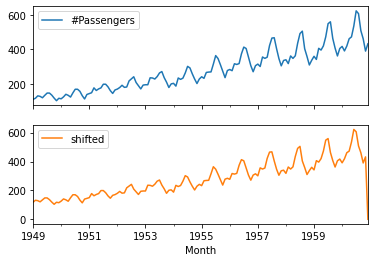

In [ ]:
reindexed_df.plot(subplots=True); #Observe, we can get two in one!

## What a difference?

Whilst we are here, we can try to produce a difference vector from our time series.

In [ ]:
pd.concat([reindexed_df,  ## <- our dataframe
           reindexed_df["#Passengers"].diff(1).rename("diff"), ## <- our diffed series, renamed to "diff"
           ], axis=1)

,#Passengers,shifted,diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0
...,...,...,...
1960-08-01,606,622.0,-16.0
1960-09-01,508,606.0,-98.0
1960-10-01,461,508.0,-47.0


In [ ]:
diff = reindexed_df["#Passengers"].diff(-1) == reindexed_df["#Passengers"]-reindexed_df.shifted
diff[-5:]

Month
1960-08-01     True
1960-09-01     True
1960-10-01     True
1960-11-01     True
1960-12-01    False
dtype: bool

**Takeaway:**

DataFrame.diff() "Calculates the difference of a DataFrame element compared with another element in the DataFrame (default is the element in the same column of the previous row).

periods : int, default 1
Periods to shift for calculating difference, accepts negative values."

## Resampling

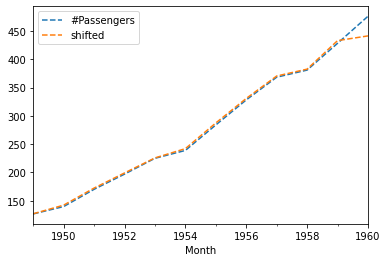

In [ ]:
reindexed_df.resample("AS").mean().plot(style='--'); #"A" meaning Annual, "S" meaning start, "year begin"...

We were so adept to introduce a bias there with our 0 value.

This can hurt big time, so bear in mind...

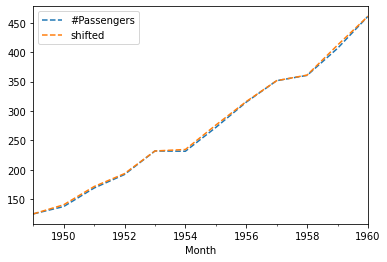

In [ ]:
reindexed_df.resample("AS").median().plot(style='--');

Median helps...

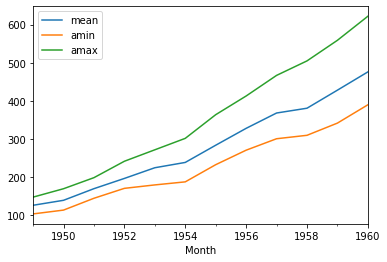

In [ ]:
reindexed_df["#Passengers"].resample("A").apply(['mean', np.min, np.max]).plot(subplots=False);

## Rolling window functions

In [ ]:
import matplotlib.pyplot as plt

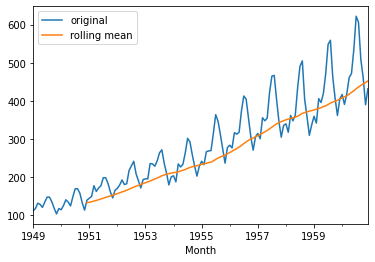

In [ ]:
reindexed_df["#Passengers"].plot(label="original")

rolling_series = reindexed_df["#Passengers"].rolling(window=24, center=False).mean()
rolling_series.plot(label="rolling mean")

plt.legend()
plt.show()

Can come in super handy for financial time series - think "moving average"!!!

## Correlations

In [ ]:
reindexed_df.corr()

,#Passengers,shifted
#Passengers,1.000000,0.916288
shifted,0.916288,1.000000


In [ ]:
for lag in [1, 2, 3, 12]:
  print("Autocorrelation with lag", lag, " is\t",
        reindexed_df["#Passengers"].autocorr(lag) )

Autocorrelation with lag 1  is	 0.9601946480498523
Autocorrelation with lag 2  is	 0.8956753113926396
Autocorrelation with lag 3  is	 0.837394765081794
Autocorrelation with lag 12  is	 0.990527369208544


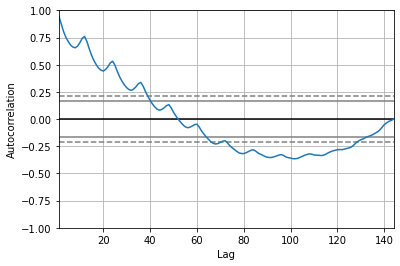

In [ ]:
pd.plotting.autocorrelation_plot(reindexed_df["#Passengers"]);
## The horizontal lines in the plot correspond to 95% and 99% confidence bands.
## Note: this is autocorrelation, not partial autocorrelation.

# Other useful tools

For a wider range of time series tools in Python see [here](https://github.com/MaxBenChrist/awesome_time_series_in_python) and [here](https://tomaugspurger.github.io/modern-7-timeseries).

For holiday handling see [here](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-holiday) and [here](https://towardsdatascience.com/holiday-calendars-with-pandas-9c01f1ee5fee).
